In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
X = []
y = []

In [3]:
os.getcwd()

'/home/q/RnE-2nd/src'

In [4]:
for i in os.listdir("./faces"):
    if '_questions' in i:
        y.append(1.)
    else:
        y.append(0.)
    img = cv2.imread(f"./faces/{i}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (50, 50))
    X.append(img)

In [5]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(221, 50, 50)
(221,)


In [6]:
train_img, test_img, train_labels, test_labels = train_test_split(X, y, test_size=0.2, shuffle=True)

In [7]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(8, 3, activation='relu', padding='same', input_shape=(50, 50, 1)))
    model.add(keras.layers.MaxPool2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    return model

In [8]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

2022-12-26 01:59:23.772145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 01:59:23.814556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 01:59:23.814759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 01:59:23.815361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

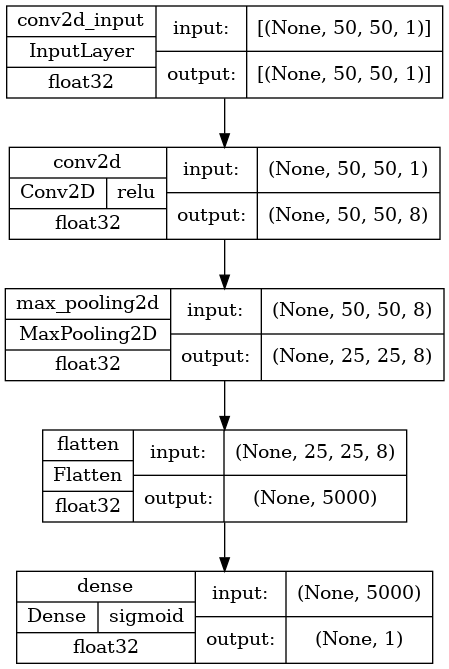

In [9]:
keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
plt.figure(figsize=(15, 9))
for i in range(15):
    img_idx = np.random.randint(0, 174)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[img_idx])

In [ ]:
history = model.fit(train_img, train_labels, validation_split=0.2, epochs=100)

In [ ]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model.save("./discriminator.h5")